In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('ticks')
#plt.rc('figure', figsize=(12, 8))

In [2]:
datadir = '../../data/processed/'

In [26]:
# load in data for plots
movie_model_corrs = np.load(datadir+'/dropfeat_models/dropfeat_m_model_impact.npy').item()
movie_recall_corrs = np.load(datadir+'/dropfeat_models/dropfeat_m_r_models_impact.npy')[0]
movie_recall_ses = np.load(datadir+'/dropfeat_models/dropfeat_m_r_models_impact.npy')[1]
feature_feature_corrs = np.load(datadir+'/dropfeat_models/feature_feature_corrmat.npy').item()

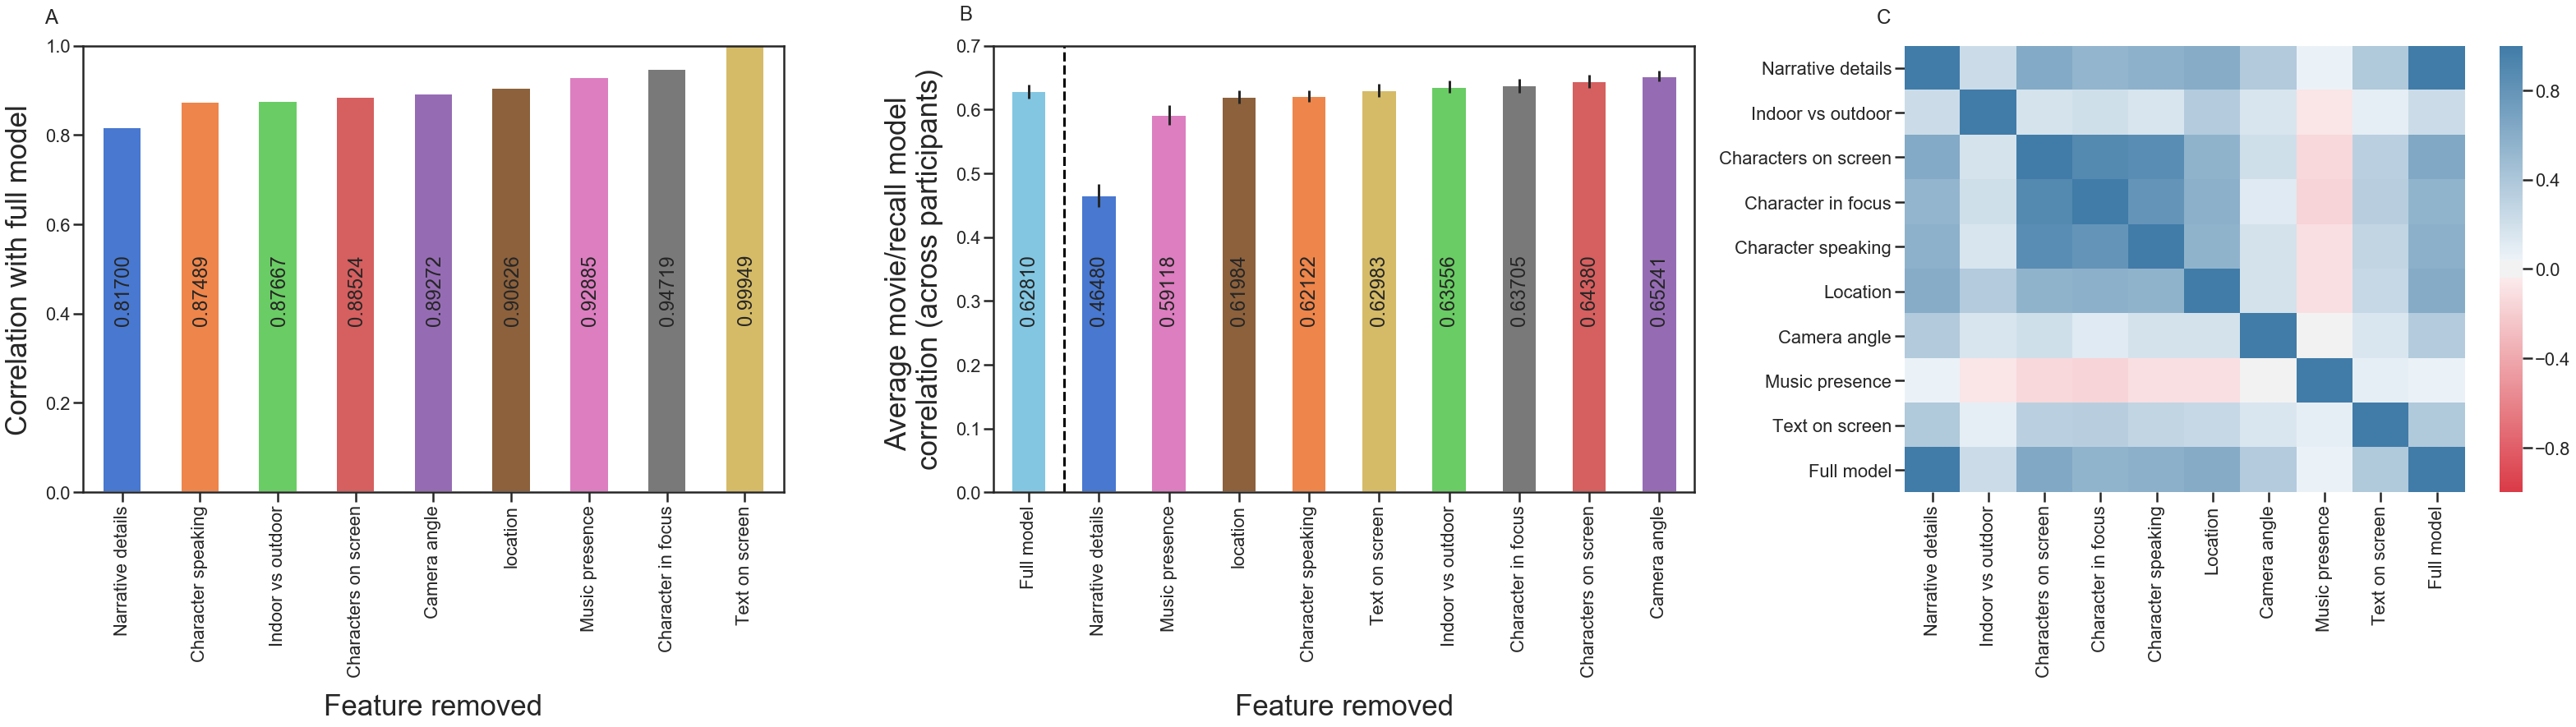

In [55]:
sns.set_palette('muted')
fig, axes = plt.subplots(1,3)
fig.set_size_inches(55, 10)
plt.subplots_adjust(wspace=.3)

# subplot A
m_m_series_ord = pd.Series(movie_model_corrs).sort_values()
m_m_series_ord.plot(ax=axes[0], kind='bar', ylim=[0,1])
axes[0].text(-1, 1.05, 'A')

for idx, corr in enumerate(m_m_series_ord.values):
    axes[0].text(idx-.1, 0.5, '%.5f'%corr, rotation='vertical')

axes[0].set_ylabel('Correlation with full model', size=35, labelpad=15)
axes[0].set_xlabel('Feature removed', size=35, labelpad=20)

# subplot B
# desired order of bars
m_r_model_order = ['Full model','Narrative details','Music presence', 'location','Character speaking','Text on screen',
                 'Indoor vs outdoor','Character in focus','Characters on screen','Camera angle']

m_r_series_ord = pd.Series(movie_recall_corrs).reindex(m_r_model_order)
m_r_series_ord.plot(ax=axes[1], kind='bar', ylim=[0,0.7], yerr=pd.Series(movie_recall_ses), 
                    color=['#82C6E2','#4878D0','#DC7EC0','#8C613C','#EE854A','#D5BB67','#6ACC64','#797979','#D65F5F',
                           '#956CB4']) # match bar color between plots

# visually separate full model from partials
axes[1].axvline(0.5, color='k', linestyle='dashed')

axes[1].text(-1, .74, 'B')
for idx, corr in enumerate(m_r_series_ord.values):
    axes[1].text(idx-.13, 0.35, '%.5f'%corr, rotation='vertical')

axes[1].set_ylabel('Average movie/recall model \ncorrelation (across participants)', size=35, labelpad=15)
axes[1].set_xlabel('Feature removed', size=35, labelpad=20)

# subplot C
cmap = sns.diverging_palette(10, 240, as_cmap=True)
corrmat = sns.heatmap(pd.DataFrame(feature_feature_corrs), vmin=-1, vmax=1, cmap=cmap)
axes[2].text(-.5, -.5, 'C')

plt.savefig('../../paper/figs/supp5_feature_impact_analysis.pdf', bbox_inches='tight')

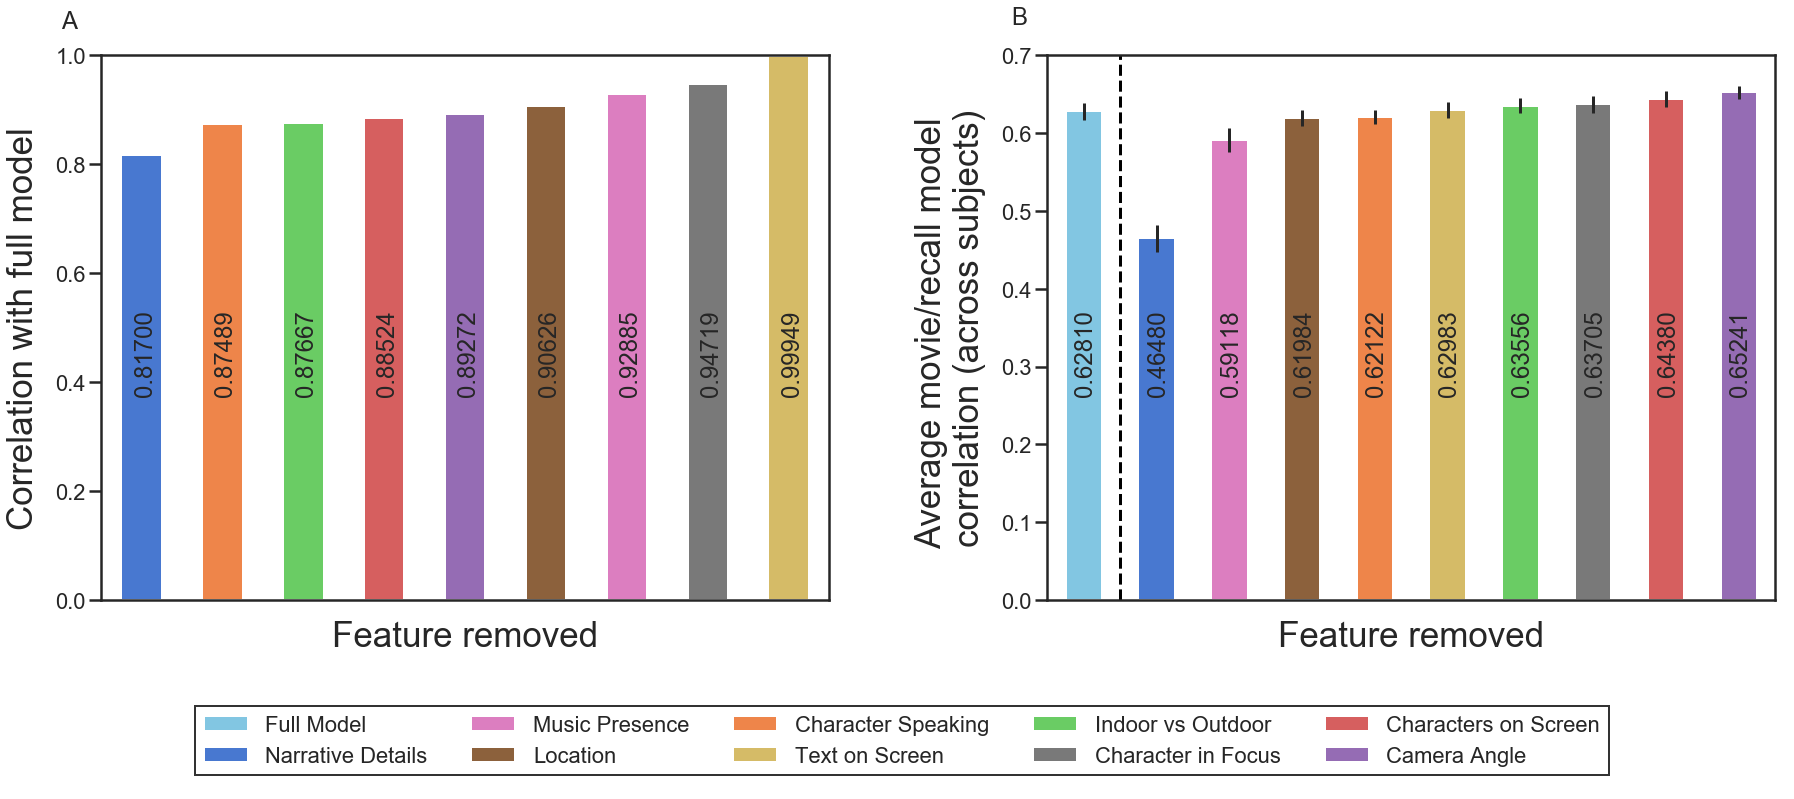

In [5]:
sns.set_palette('muted')
fig, axes = plt.subplots(1,2)
fig.set_size_inches(30, 12)
plt.subplots_adjust(wspace=.3, bottom=.25)

# subplot A
m_m_series_ord = pd.Series(movie_model_corrs).sort_values()
m_m_series_ord.plot(ax=axes[0], kind='bar', ylim=[0,1])
axes[0].text(-1, 1.05, 'A')
for idx, corr in enumerate(m_m_series_ord.values):
    axes[0].text(idx-.1, 0.5, '%.5f'%corr, rotation='vertical')
axes[0].set_ylabel('Correlation with full model', size=35, labelpad=15)
axes[0].set_xlabel('Feature removed', size=35, labelpad=20)


# subplot B
# desired order of bars
m_r_model_order = ['Full Model','Narrative Details','Music Presence', 'Location','Character Speaking',
                   'Text on Screen','Indoor vs Outdoor','Character in Focus','Characters on Screen','Camera Angle']

m_r_series_ord = pd.Series(movie_recall_corrs).reindex(m_r_model_order)
m_r_series_ord.plot(ax=axes[1], kind='bar', ylim=[0,0.7], yerr=pd.Series(movie_recall_ses), 
                    color=['#82C6E2','#4878D0','#DC7EC0','#8C613C','#EE854A','#D5BB67','#6ACC64','#797979','#D65F5F',
                           '#956CB4']) # match bar color between plots

# visually separate full model from partials
plt.axvline(0.5, color='k', linestyle='dashed')

axes[1].text(-1, .74, 'B')
for idx, corr in enumerate(m_r_series_ord.values):
    axes[1].text(idx-.13, 0.35, '%.5f'%corr, rotation='vertical')

axes[1].set_ylabel('Average movie/recall model \ncorrelation (across subjects)', size=35, labelpad=15)
axes[1].set_xlabel('Feature removed', size=35, labelpad=20)

# legend
for ax in axes:
    ax.xaxis.set_ticks([]) # remove ticks
handles = axes[1].get_legend_handles_labels()[0][0]
labels = m_r_model_order
fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.75, .12), edgecolor='k', fancybox=False)

#plt.savefig('../../paper/figs/5_feature_impact_analysis_leg.pdf', bbox_inches='tight')